In [14]:
import pickle
import ssl

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_predict, cross_val_score

ssl._create_default_https_context = ssl._create_unverified_context

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
X, y = mnist["data"], mnist["target"]

5


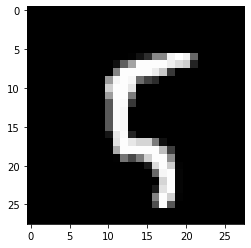

In [16]:
index = 100
digit = X.iloc[index]
digit_image = digit.array.reshape(28, 28)
plt.imshow(digit_image, cmap="gray")

print(y[index])

In [17]:
y = y.astype(np.uint8)


In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)



SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([digit])

/usr/local/anaconda3/envs/ds-37/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [23]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [24]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [26]:
from sklearn.cluster import KMeans 
k=10
kmeans = KMeans(n_clusters=k) 
y_pred = kmeans.fit_predict(X)

In [27]:
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.6511713705958311